In [1]:
import os
import cv2

TRAIN_DIR = "data/train"
TEST_DIR = "data/test"

train_images = [os.path.join(TRAIN_DIR, filename) for filename in os.listdir(TRAIN_DIR)]

In [2]:
# Extract filenames for training images and the corresponding segmentation.
# Write this data to a file for posterity.
file_prefix = [f.rsplit(".", 1)[0] for f in train_images if not f.endswith("mask.tif")]
mask_images = set(f for f in train_images if f.endswith("mask.tif"))
train_data = [(x+".tif", x+"_mask.tif") for x in file_prefix if x+"_mask.tif" in mask_images]
train_X, train_y = zip(*train_data)

with open("train_images.txt",'w') as fp:
    for filename in train_X:
        print >> fp, filename
        
with open("train_masks.txt", 'w') as fp:
    for filename in train_y:
        print >> fp, filename

In [10]:
print cv2.imread(train_y[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(420, 580, 3)


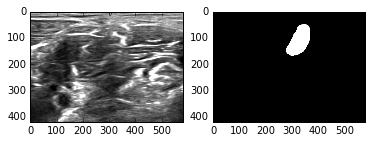

In [5]:
# Let's visualize a couple a training pair just as a sanity check

%matplotlib inline
import matplotlib.pyplot as plt
from image_utils import cv_imshow

def show_image_and_mask(idx):
    """ Displays a training image and the mask. """
    im = cv2.imread(train_X[idx])
    plt.subplot(121)
    cv_imshow(im)

    mask = cv2.imread(train_y[idx])
    plt.subplot(122)
    cv_imshow(mask)
    
show_image_and_mask(4)

In [7]:
from convert_to_record import create_tf_record, image_generator

create_tf_record(image_generator('train_images.txt'),'train_images.tfrecord', (420, 580))
create_tf_record(image_generator('train_masks.txt'),'train_masks.tfrecord', (420, 580))

Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
